In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('BL Leo.csv')
data.head()

,JD,Mag,Magerr
0,2453470.757,13.85,0.05
1,2453470.764,13.85,0.05
2,2453470.772,13.74,0.05
3,2453470.779,13.61,0.05
4,2453490.730,13.30,0.05


In [3]:
data.shape

(394, 3)

In [4]:
(data.JD.max() - data.JD.min()) / 365.

8.199780821917605

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-whitegrid')

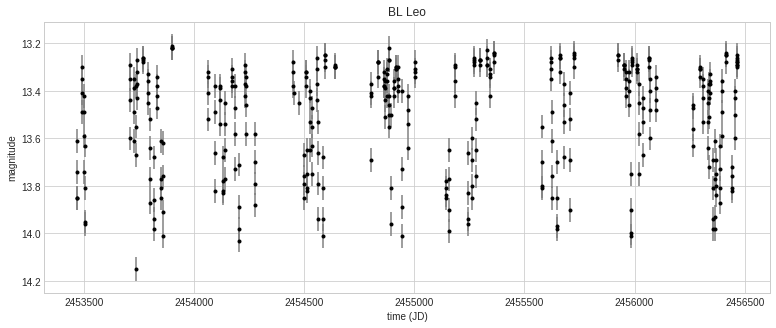

In [6]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.errorbar(data.JD, data.Mag, data.Magerr,
            fmt='.k', ecolor='gray', capsize=0)
ax.set(xlabel='time (JD)',
       ylabel='magnitude',
       title='BL Leo')
ax.invert_yaxis()

In [7]:
from astropy.timeseries import LombScargle
ls = LombScargle(data.JD, data.Mag, data.Magerr)
frequency, power = ls.autopower(nyquist_factor=400,
                                minimum_frequency=3.3**-5)

period_days = 1. / frequency
period_hours = period_days * 24

In [8]:
best_period = period_days[np.argmax(power)]

phase = (data.JD / best_period) % 1

print("Best period: {0:.2f} hours".format(24 * best_period))

Best period: 3.38 hours


[Text(0, 0.5, 'power'), (1, 5), Text(0.5, 0, 'Period (hours)')]

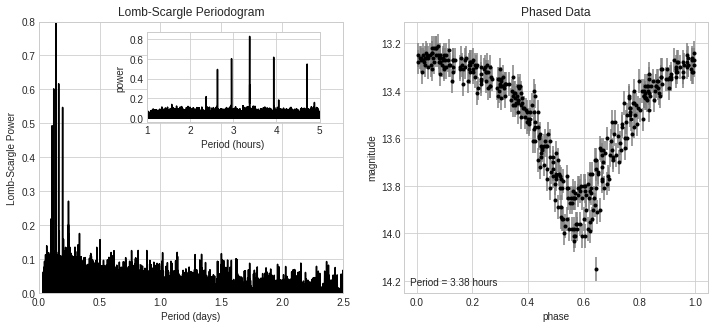

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(period_days, power, '-k', rasterized=True)

ax[0].set(xlim=(0, 2.5), ylim=(0, 0.8),
          xlabel='Period (days)',
          ylabel='Lomb-Scargle Power',
          title='Lomb-Scargle Periodogram')

ax[1].errorbar(phase, data.Mag, data.Magerr,
               fmt='.k', ecolor='gray', capsize=0)
ax[1].set(xlabel='phase',
          ylabel='magnitude',
          title='Phased Data')
ax[1].invert_yaxis()
ax[1].text(0.02, 0.03, "Period = {0:.2f} hours".format(24 * best_period),
           transform=ax[1].transAxes)

inset = fig.add_axes([0.25, 0.6, 0.2, 0.25])
inset.plot(period_hours, power, '-k', rasterized=True)
inset.xaxis.set_major_locator(plt.MultipleLocator(1))
inset.yaxis.set_major_locator(plt.MultipleLocator(0.2))
inset.set(xlim=(1, 5),
          xlabel='Period (hours)',
          ylabel='power')